In [1]:
import glob
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
def load_dataset(validation=False):
    if (validation):
        filelist_1 = glob.glob('test/1/*.jpg')
        x_test_1 = np.array([np.array(Image.open(fname)) for fname in filelist_1])
        y_test_1 = np.ones((500,1))
        flatten = x_test_1.shape[1]*x_test_1.shape[2]
        x_test_1 = x_test_1.reshape(x_test_1.shape[0], flatten)
        filelist_0 = glob.glob('test/0/*.jpg')
        x_test_0 = np.array([np.array(Image.open(fname)) for fname in filelist_0])
        y_test_0 = np.ones((500,1))
        flatten = x_test_0.shape[1]*x_test_0.shape[2]
        x_test_0 = x_test_0.reshape(x_test_0.shape[0], flatten)
        x_test = np.concatenate((x_test_0,x_test_1))
        y_test = np.concatenate((y_test_0,y_test_1))
        return x_test,y_test
    else:
        filelist_1 = glob.glob('train/1/*.jpg')
        x_train_1 = np.array([np.array(Image.open(fname)) for fname in filelist_1])
        y_train_1 = np.ones((500,1))
        flatten = x_train_1.shape[1]*x_train_1.shape[2]
        x_train_1 = x_train_1.reshape(x_train_1.shape[0], flatten)
        filelist_0 = glob.glob('train/0/*.jpg')
        x_train_0 = np.array([np.array(Image.open(fname)) for fname in filelist_0])
        y_train_0 = np.zeros((500,1))
        flatten = x_train_0.shape[1]*x_train_0.shape[2]
        x_train_0 = x_train_0.reshape(x_train_0.shape[0], flatten)
        x_train = np.concatenate((x_train_0,x_train_1))
        y_train = np.concatenate((y_train_0,y_train_1))
        return x_train, y_train

In [3]:
def normalize_data(X):
    sc = StandardScaler()
    return sc.fit_transform(X)

In [4]:
def sigmoid(x,derivative=False):
    if(derivative):
        return x*(1-x)
    return 1./(1+np.exp(-x))

In [5]:
#Function for initializing random weights
def init_weights(X):
    W = np.random.rand(1,X.shape[1])*0.01
    b = 0
    return W, b

In [6]:
def compute_cost(A,Y):
    m = Y.shape[0]
    cost = (1.0/m)*np.sum((Y-A)**2)
    return cost

In [7]:
def compute_grad(X,A,Y):
    m = Y.shape[0]
    dW = (-1.0/m)*np.dot(((Y-A)*(A)*(1-A)).T,X)
    db = (-1.0/m)*np.sum((Y-A)*(1-A)*A)
    return dW,db  

In [8]:
def update_parameters(W,b,dW,db,eta):
    W -= eta*dW
    b -= eta*db
    return W,b

In [9]:
def validation(W,b,x_test):
    yhat = np.round(sigmoid(np.dot(x_test,W.T)+b))
    return yhat

In [10]:
def main(X,y,number_of_iter = 10000):
    W,b = init_weights(X)
    lr = 1
    l_cost=[]
       
    for j in range(number_of_iter):
        A = sigmoid(np.dot(X,W.T)+b)
        
        cost_ = compute_cost(A,y)
        l_cost.append(cost_)
        
        
        if j%100 is 0:
            print ("Cost is {}".format(cost_))
            
        
        dW, db = compute_grad(X,A,y)
        W, b = update_parameters(W,b,dW,db,lr)
    return W,b,l_cost

In [11]:
X, y = load_dataset()
X = normalize_data(X)

/home/stan/anaconda2/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Cost is 0.29405007503084785
Cost is 0.0029989595792551016
Cost is 0.0015320720368164756
Cost is 0.0010135287442776123
Cost is 0.0007517361025273913
Cost is 0.0005949947991795702
Cost is 0.0004911027111398961
Cost is 0.00041740038486044024
Cost is 0.0003625075930775726
Cost is 0.0003200996367913526


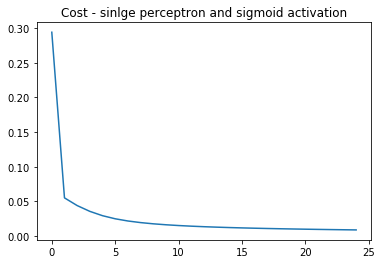

In [14]:
no_of_iter = 1000
final_W , final_b , l_cost= main(X,y,no_of_iter)
plt.title("Cost - sinlge perceptron and sigmoid activation")
plt.plot(l_cost[:25])
plt.show()

In [15]:
x_test, y_test = load_dataset(validation=True)
x_test = normalize_data(x_test)
predictions = validation(final_W,final_b,x_test)
acc = np.mean(y_test==predictions)
print ("Accuracy is {}%".format(acc*100))

Accuracy is 49.6%


/home/stan/anaconda2/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
